In [1]:
import pandas as pd
import numpy as np
from scipy import signal
from scipy.io import loadmat
import matplotlib.pyplot as plt
from sklearn.decomposition import FastICA

In [2]:
DATAPATH = 'data/fetal_ECG.mat'
CSVPATH = 'data/ECGs.csv'

In [3]:
data = loadmat(r"I:\Work\ECG\fetal_ECG\data\fetal_ECG.mat")
mother = data['Mother_ECG_chest']
abdomen = data['abdomen_recorded_signal']
unknow = data['Fetal_ECG_unknow']

data = np.column_stack((mother, abdomen, unknow))
np.savetxt('data/ECGs.csv', data, delimiter=',')

In [4]:
df = pd.read_csv(CSVPATH)

mother = df.iloc[:, 0]
abdomen = df.iloc[:, 1]
unknow = df.iloc[:, 2]
time = np.linspace(0, 2000, 1999)

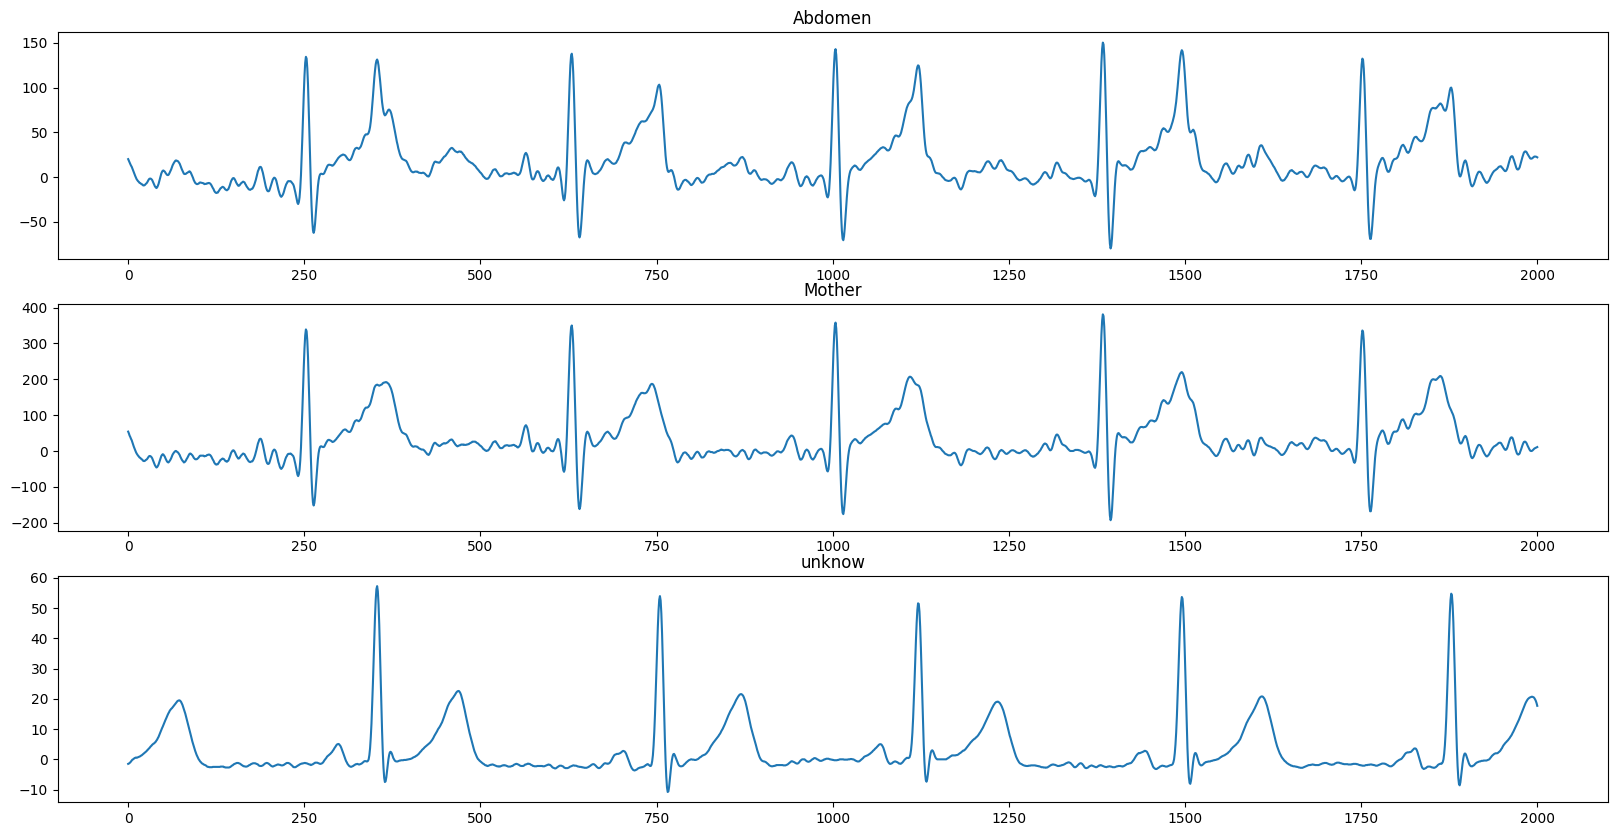

In [5]:
plt.figure(figsize=(20, 10))

plt.subplot(3, 1, 1)
plt.plot(time, abdomen)
plt.title('Abdomen')

plt.subplot(3, 1, 2)
plt.plot(time, mother)
plt.title('Mother')

plt.subplot(3, 1, 3)
plt.plot(time, unknow)
plt.title('unknow')

plt.show()

In [ ]:
mother = np.asarray([[int(i)] for i in mother])
abdomen = np.asarray([[int(j)] for j in abdomen])
unknow = np.asarray([[int(k)] for k in unknow])

I:\Work\ECG\fetal_ECG\venv\Lib\site-packages\sklearn\decomposition\_fastica.py:582: UserWarning: n_components is too large: it will be set to 1
  warnings.warn(


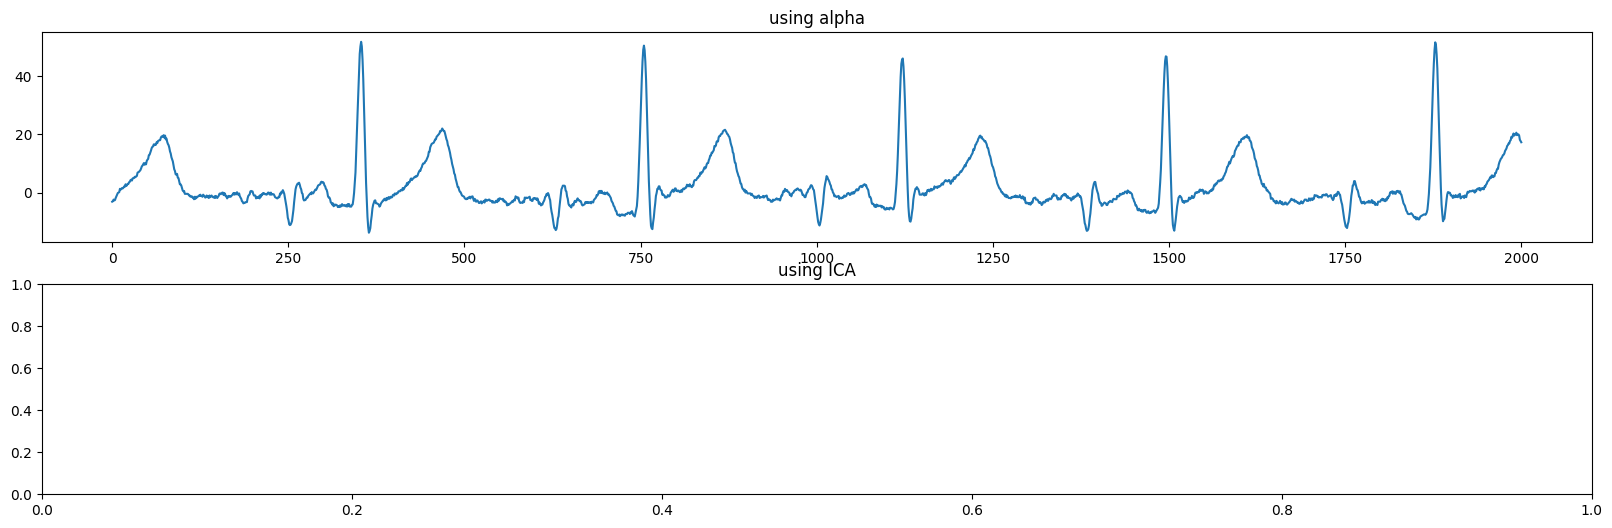

In [9]:
plt.figure(figsize=(20, 6))

plt.subplot(2, 1, 1)
plt.title('using alpha')
alpha = np.divide(np.dot(mother.T, abdomen), (np.dot(mother.T, mother)))
fetal = abdomen - (alpha * mother)
plt.plot(time, fetal)


#working on it ...
plt.subplot(2, 1, 2)
plt.title('using ICA')
maternal_ecg = np.vstack((mother, abdomen))
ica = FastICA(n_components=2)
sources = ica.fit_transform(maternal_ecg)

plt.show()

# compare two fetal signal

Mean Squared Error (MSE) :  6.858430290804397
Root Mean Squared Error (RMSE) :  2.618860494719869


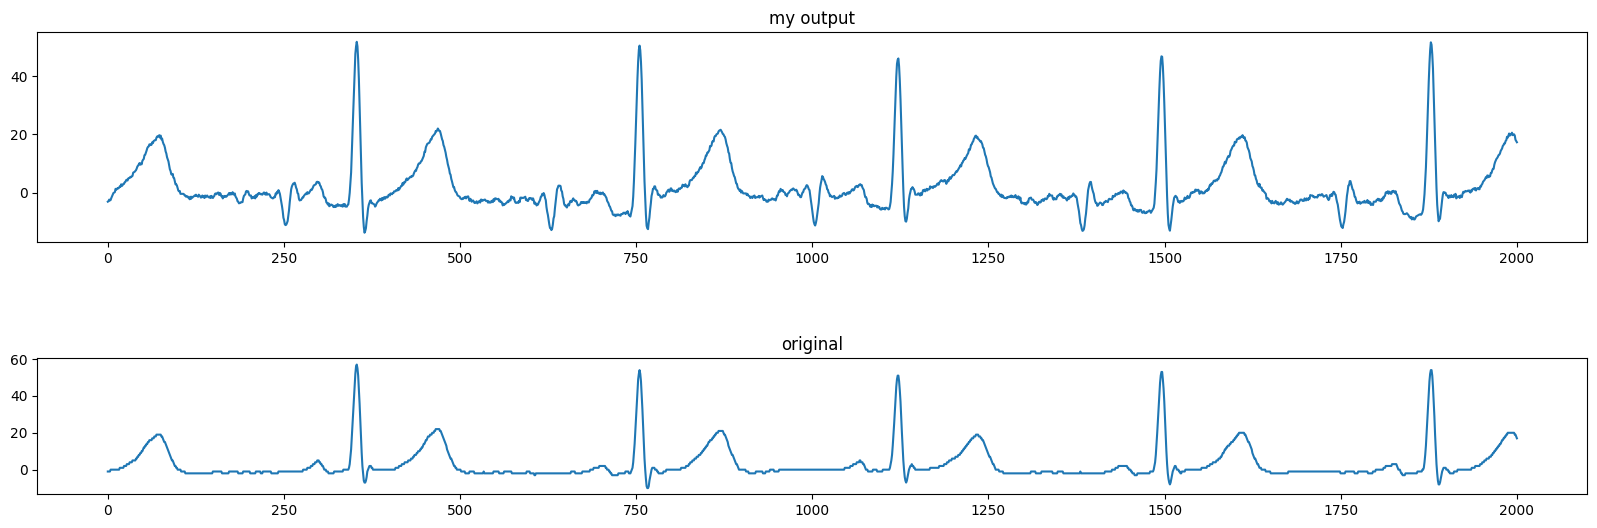

In [15]:
plt.figure(figsize=(20, 6))

mse = np.mean((unknow - fetal) ** 2)
print('Mean Squared Error (MSE) : ', mse )
rmse = np.sqrt(mse)
print('Root Mean Squared Error (RMSE) : ', rmse)

plt.subplot(2, 1, 1)
plt.title('my output')
plt.plot(time, fetal)

plt.subplot(3, 1, 3)
plt.plot(time, unknow)
plt.title('original')

plt.show()